In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [2]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 18_02_2022 07_33_42.xlsx'

In [3]:
if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')

In [4]:
dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')
#dados = pd.read_excel('Z:/Banco SIVEP Exportação/Banco SIVEP 26_01_2022 07_33_07.xlsx')

In [5]:
filtrado = dados[['Tem Comorbidade','Doenca Cardiovascular','Diabetes mellitus','Obesidade','Doenca Neurologica','Outra Pneumatopatia','Faixa Etaria','Classificacao final','Houve internacao','Evolucao']]
filtrado['Faixa Etaria'] = filtrado['Faixa Etaria'].map({'0-9 anos':'0-9 anos','10-19 anos':'10-19 anos','20-29 anos':'20-59 anos','30-39 anos':'20-59 anos',
                                                         '40-49 anos':'20-59 anos','50-59 anos':'20-59 anos','60-69 anos':'60 anos ou mais','70-79 anos':'60 anos ou mais',
                                                         '80 e mais anos':'60 anos ou mais'})
filtrado['Doenca Cardiovascular'] = filtrado['Doenca Cardiovascular'].map({1.0:'Doença cardiovascular'})
filtrado['Diabetes mellitus'] = filtrado['Diabetes mellitus'].map({1.0:'Diabetes mellitus'})
filtrado['Obesidade'] = filtrado['Obesidade'].map({'1':'Obesidade'})
filtrado['Doenca Neurologica'] = filtrado['Doenca Neurologica'].map({1.0:'Doença neurológica'})
filtrado['Outra Pneumatopatia'] = filtrado['Outra Pneumatopatia'].map({1.0:'Outra pneumatopatia'})
filtrado

C:\Users\RYAN-R~1\AppData\Local\Temp/ipykernel_3140/2970160481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtrado['Faixa Etaria'] = filtrado['Faixa Etaria'].map({'0-9 anos':'0-9 anos','10-19 anos':'10-19 anos','20-29 anos':'20-59 anos','30-39 anos':'20-59 anos',
C:\Users\RYAN-R~1\AppData\Local\Temp/ipykernel_3140/2970160481.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtrado['Doenca Cardiovascular'] = filtrado['Doenca Cardiovascular'].map({1.0:'Doença cardiovascular'})
C:\Users\RYAN-R~1\A

,Tem Comorbidade,Doenca Cardiovascular,Diabetes mellitus,Obesidade,Doenca Neurologica,Outra Pneumatopatia,Faixa Etaria,Classificacao final,Houve internacao,Evolucao
0,Não,NaN,NaN,NaN,NaN,NaN,20-59 anos,COVID-19,Não,Óbito
1,Sim,Doença cardiovascular,Diabetes mellitus,Obesidade,NaN,Outra pneumatopatia,60 anos ou mais,COVID-19,Sim,Cura
2,Não,NaN,NaN,NaN,NaN,NaN,20-59 anos,COVID-19,Sim,Cura
3,Não,NaN,NaN,NaN,NaN,NaN,60 anos ou mais,COVID-19,Não,Óbito
4,Não,NaN,NaN,NaN,NaN,NaN,20-59 anos,COVID-19,Sim,Cura
...,...,...,...,...,...,...,...,...,...,...
164941,Não,NaN,NaN,NaN,NaN,NaN,60 anos ou mais,COVID-19,Sim,Cura
164942,Sim,Doença cardiovascular,Diabetes mellitus,NaN,NaN,NaN,60 anos ou mais,COVID-19,Sim,Óbito
164943,Sim,Doença cardiovascular,Diabetes mellitus,NaN,NaN,NaN,20-59 anos,COVID-19,Sim,Cura
164944,Sim,NaN,NaN,NaN,NaN,NaN,60 anos ou mais,SRAG não especificado,Sim,Cura


In [6]:
anos60Mais_obito = filtrado.loc[filtrado['Faixa Etaria']=='60 anos ou mais']
anos60Mais_obito = anos60Mais_obito.loc[anos60Mais_obito['Classificacao final']=='COVID-19']
anos60Mais_obito = anos60Mais_obito.loc[anos60Mais_obito['Evolucao']=='Óbito']

In [7]:
temComorbidade_obito = anos60Mais_obito.loc[anos60Mais_obito['Tem Comorbidade']=='Sim']
temComorbidade_obito = temComorbidade_obito.groupby('Tem Comorbidade').count()
temComorbidade_obito = temComorbidade_obito.drop(temComorbidade_obito.columns[[0,1,2,3,4,5,6,7]],axis=1)
doencaCardio_obito = anos60Mais_obito.groupby('Doenca Cardiovascular').count()
doencaCardio_obito = doencaCardio_obito.drop(doencaCardio_obito.columns[[0,1,2,3,4,5,6,7]],axis=1)
diabetesmellitus_obito = anos60Mais_obito.groupby('Diabetes mellitus').count()
diabetesmellitus_obito = diabetesmellitus_obito.drop(diabetesmellitus_obito.columns[[0,1,2,3,4,5,6,7]],axis=1)
obesidade_obito = anos60Mais_obito.groupby('Obesidade').count()
obesidade_obito = obesidade_obito.drop(obesidade_obito.columns[[0,1,2,3,4,5,6,7]],axis=1)
doencaneuro_obito = anos60Mais_obito.groupby('Doenca Neurologica').count()
doencaneuro_obito = doencaneuro_obito.drop(doencaneuro_obito.columns[[0,1,2,3,4,5,6,7]],axis=1)
outrapneu_obito = anos60Mais_obito.groupby('Outra Pneumatopatia').count()
outrapneu_obito = outrapneu_obito.drop(outrapneu_obito.columns[[0,1,2,3,4,5,6,7]],axis=1)
outrapneu_obito

,Evolucao
Outra Pneumatopatia,
Outra pneumatopatia,2923


In [8]:
totalObitos_anos60Mais = filtrado.loc[filtrado['Faixa Etaria']=='60 anos ou mais']
totalObitos_anos60Mais = totalObitos_anos60Mais.loc[totalObitos_anos60Mais['Evolucao']=='Óbito']
totalObitos_anos60Mais = totalObitos_anos60Mais.loc[totalObitos_anos60Mais['Classificacao final']=='COVID-19']
totalObitos_anos60Mais = totalObitos_anos60Mais.groupby('Evolucao').count()
totalObitos_anos60Mais = totalObitos_anos60Mais.drop(totalObitos_anos60Mais.columns[[0,1,2,3,4,5,6,7]],axis=1)
totalObitos_anos60Mais = totalObitos_anos60Mais.reset_index()
totalObitos_anos60Mais = totalObitos_anos60Mais['Houve internacao']
totalObitos_anos60Mais

0    27169
Name: Houve internacao, dtype: int64

In [9]:
juntaAnos60Mais_obito = temComorbidade_obito.append(doencaCardio_obito)
juntaAnos60Mais_obito = juntaAnos60Mais_obito.append(diabetesmellitus_obito)
juntaAnos60Mais_obito = juntaAnos60Mais_obito.append(obesidade_obito)
juntaAnos60Mais_obito = juntaAnos60Mais_obito.append(doencaneuro_obito)
juntaAnos60Mais_obito = juntaAnos60Mais_obito.append(outrapneu_obito)
juntaAnos60Mais_obito = juntaAnos60Mais_obito.rename({'Sim':'Alguma comorbidade'})
juntaAnos60Mais_obito = juntaAnos60Mais_obito.reset_index()
juntaAnos60Mais_obito

,index,Evolucao
0,Alguma comorbidade,24536
1,Doença cardiovascular,14391
2,Diabetes mellitus,9887
3,Obesidade,3079
4,Doença neurológica,3349
5,Outra pneumatopatia,2923


In [10]:
ordenaAnos60Mais_obito = juntaAnos60Mais_obito.copy()
ordenaAnos60Mais_obito.loc[0] = juntaAnos60Mais_obito.loc[5]
ordenaAnos60Mais_obito.loc[1] = juntaAnos60Mais_obito.loc[3]
ordenaAnos60Mais_obito.loc[2] = juntaAnos60Mais_obito.loc[4]
ordenaAnos60Mais_obito.loc[3] = juntaAnos60Mais_obito.loc[2]
ordenaAnos60Mais_obito.loc[4] = juntaAnos60Mais_obito.loc[1]
ordenaAnos60Mais_obito.loc[5] = juntaAnos60Mais_obito.loc[0]
ordenaAnos60Mais_obito

,index,Evolucao
0,Outra pneumatopatia,2923
1,Obesidade,3079
2,Doença neurológica,3349
3,Diabetes mellitus,9887
4,Doença cardiovascular,14391
5,Alguma comorbidade,24536


In [11]:
divisao = pd.DataFrame(columns={'Valores'})
for i in np.arange(0,len(ordenaAnos60Mais_obito),1):
    divisao.loc[i] = totalObitos_anos60Mais.loc[0]
divisao = divisao.fillna(ordenaAnos60Mais_obito)

In [12]:
calcula_anos60Mais_obito = ordenaAnos60Mais_obito['Evolucao']/divisao['Valores']*100
calcula_anos60Mais_obito = calcula_anos60Mais_obito.to_frame()
calcula_anos60Mais_obito = calcula_anos60Mais_obito.rename(columns={0:'Evolucao'})
calcula_anos60Mais_obito = calcula_anos60Mais_obito['Evolucao']
calcula_anos60Mais_obito

0    10.758585
1    11.332769
2    12.326549
3    36.390739
4    52.968457
5    90.308808
Name: Evolucao, dtype: object

In [13]:
anos60Mais_hospi = filtrado.loc[filtrado['Faixa Etaria']=='60 anos ou mais']
anos60Mais_hospi = anos60Mais_hospi.loc[anos60Mais_hospi['Houve internacao']=='Sim']
anos60Mais_hospi = anos60Mais_hospi.loc[anos60Mais_hospi['Classificacao final']=='COVID-19']
anos60Mais_hospi

,Tem Comorbidade,Doenca Cardiovascular,Diabetes mellitus,Obesidade,Doenca Neurologica,Outra Pneumatopatia,Faixa Etaria,Classificacao final,Houve internacao,Evolucao
1,Sim,Doença cardiovascular,Diabetes mellitus,Obesidade,NaN,Outra pneumatopatia,60 anos ou mais,COVID-19,Sim,Cura
6,Sim,NaN,NaN,NaN,NaN,NaN,60 anos ou mais,COVID-19,Sim,Óbito
9,Não,NaN,NaN,NaN,NaN,NaN,60 anos ou mais,COVID-19,Sim,Segue Internado
12,Sim,Doença cardiovascular,Diabetes mellitus,NaN,NaN,NaN,60 anos ou mais,COVID-19,Sim,Óbito
22,Sim,Doença cardiovascular,Diabetes mellitus,Obesidade,NaN,NaN,60 anos ou mais,COVID-19,Sim,Óbito
...,...,...,...,...,...,...,...,...,...,...
164937,Sim,Doença cardiovascular,NaN,NaN,NaN,NaN,60 anos ou mais,COVID-19,Sim,Óbito
164939,Sim,Doença cardiovascular,Diabetes mellitus,NaN,Doença neurológica,NaN,60 anos ou mais,COVID-19,Sim,Cura
164940,Sim,Doença cardiovascular,Diabetes mellitus,NaN,NaN,NaN,60 anos ou mais,COVID-19,Sim,Cura
164941,Não,NaN,NaN,NaN,NaN,NaN,60 anos ou mais,COVID-19,Sim,Cura


In [14]:
#for i in range(len(filtrado)):
  #  if(filtrado['has'].loc[i]==1.0):
 #       filtrado['Doenca Cardiovascular'].loc[i] = 1.0
 #   else:
 #       pass

In [15]:
temComorbidade_hospi = anos60Mais_hospi.loc[anos60Mais_hospi['Tem Comorbidade']=='Sim']
temComorbidade_hospi = temComorbidade_hospi.groupby('Tem Comorbidade').count()
temComorbidade_hospi = temComorbidade_hospi.drop(temComorbidade_hospi.columns[[0,1,2,3,4,5,6,7]],axis=1)
doencaCardio_hospi = anos60Mais_hospi.groupby('Doenca Cardiovascular').count()
doencaCardio_hospi = doencaCardio_hospi.drop(doencaCardio_hospi.columns[[0,1,2,3,4,5,6,7]],axis=1)
diabetesmellitus_hospi = anos60Mais_hospi.groupby('Diabetes mellitus').count()
diabetesmellitus_hospi = diabetesmellitus_hospi.drop(diabetesmellitus_hospi.columns[[0,1,2,3,4,5,6,7]],axis=1)
obesidade_hospi = anos60Mais_hospi.groupby('Obesidade').count()
obesidade_hospi = obesidade_hospi.drop(obesidade_hospi.columns[[0,1,2,3,4,5,6,7]],axis=1)
doencaneuro_hospi = anos60Mais_hospi.groupby('Doenca Neurologica').count()
doencaneuro_hospi = doencaneuro_hospi.drop(doencaneuro_hospi.columns[[0,1,2,3,4,5,6,7]],axis=1)
outrapneu_hospi = anos60Mais_hospi.groupby('Outra Pneumatopatia').count()
outrapneu_hospi = outrapneu_hospi.drop(outrapneu_hospi.columns[[0,1,2,3,4,5,6,7]],axis=1)
outrapneu_hospi

,Evolucao
Outra Pneumatopatia,
Outra pneumatopatia,5223


In [16]:
totalHospi_anos60Mais = filtrado.loc[filtrado['Faixa Etaria']=='60 anos ou mais']
totalHospi_anos60Mais = totalHospi_anos60Mais.loc[totalHospi_anos60Mais['Houve internacao']=='Sim']
totalHospi_anos60Mais = totalHospi_anos60Mais.loc[totalHospi_anos60Mais['Classificacao final']=='COVID-19']
totalHospi_anos60Mais = totalHospi_anos60Mais.groupby('Houve internacao').count()
totalHospi_anos60Mais = totalHospi_anos60Mais.drop(totalHospi_anos60Mais.columns[[0,1,2,3,4,5,6,7]],axis=1)
totalHospi_anos60Mais = totalHospi_anos60Mais.reset_index()
totalHospi_anos60Mais = totalHospi_anos60Mais['Evolucao']
totalHospi_anos60Mais

0    60096
Name: Evolucao, dtype: int64

In [17]:
juntaAnos60Mais_hospi = temComorbidade_hospi.append(doencaCardio_hospi)
juntaAnos60Mais_hospi = juntaAnos60Mais_hospi.append(diabetesmellitus_hospi)
juntaAnos60Mais_hospi = juntaAnos60Mais_hospi.append(obesidade_hospi)
juntaAnos60Mais_hospi = juntaAnos60Mais_hospi.append(doencaneuro_hospi)
juntaAnos60Mais_hospi = juntaAnos60Mais_hospi.append(outrapneu_hospi)
juntaAnos60Mais_hospi = juntaAnos60Mais_hospi.rename({'Sim':'Alguma comorbidade'})
juntaAnos60Mais_hospi = juntaAnos60Mais_hospi.reset_index()
juntaAnos60Mais_hospi

,index,Evolucao
0,Alguma comorbidade,50572
1,Doença cardiovascular,29645
2,Diabetes mellitus,19866
3,Obesidade,6033
4,Doença neurológica,5214
5,Outra pneumatopatia,5223


In [18]:
ordenaAnos60Mais_hospi = juntaAnos60Mais_hospi.copy()
ordenaAnos60Mais_hospi.loc[0] = juntaAnos60Mais_hospi.loc[5]
ordenaAnos60Mais_hospi.loc[1] = juntaAnos60Mais_hospi.loc[3]
ordenaAnos60Mais_hospi.loc[2] = juntaAnos60Mais_hospi.loc[4]
ordenaAnos60Mais_hospi.loc[3] = juntaAnos60Mais_hospi.loc[2]
ordenaAnos60Mais_hospi.loc[4] = juntaAnos60Mais_hospi.loc[1]
ordenaAnos60Mais_hospi.loc[5] = juntaAnos60Mais_hospi.loc[0]
ordenaAnos60Mais_hospi

,index,Evolucao
0,Outra pneumatopatia,5223
1,Obesidade,6033
2,Doença neurológica,5214
3,Diabetes mellitus,19866
4,Doença cardiovascular,29645
5,Alguma comorbidade,50572


In [19]:
divisao = pd.DataFrame(columns={'Valores'})
for i in np.arange(0,len(ordenaAnos60Mais_hospi),1):
    divisao.loc[i] = totalHospi_anos60Mais.loc[0]
divisao = divisao.fillna(ordenaAnos60Mais_hospi)

In [20]:
calcula_anos60Mais_hospi = ordenaAnos60Mais_hospi['Evolucao']/divisao['Valores']*100
calcula_anos60Mais_hospi = calcula_anos60Mais_hospi.to_frame()
calcula_anos60Mais_hospi = calcula_anos60Mais_hospi.rename(columns={0:'Evolucao'})
calcula_anos60Mais_hospi = calcula_anos60Mais_hospi['Evolucao']
calcula_anos60Mais_hospi

0     8.691094
1    10.038938
2     8.676118
3    33.057109
4    49.329406
5    84.152023
Name: Evolucao, dtype: object

In [21]:
comorbidade = ordenaAnos60Mais_obito['index']

In [22]:
legenda = pd.DataFrame(columns=['Óbito','Hospitalização'])

In [23]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 18_2_2022'

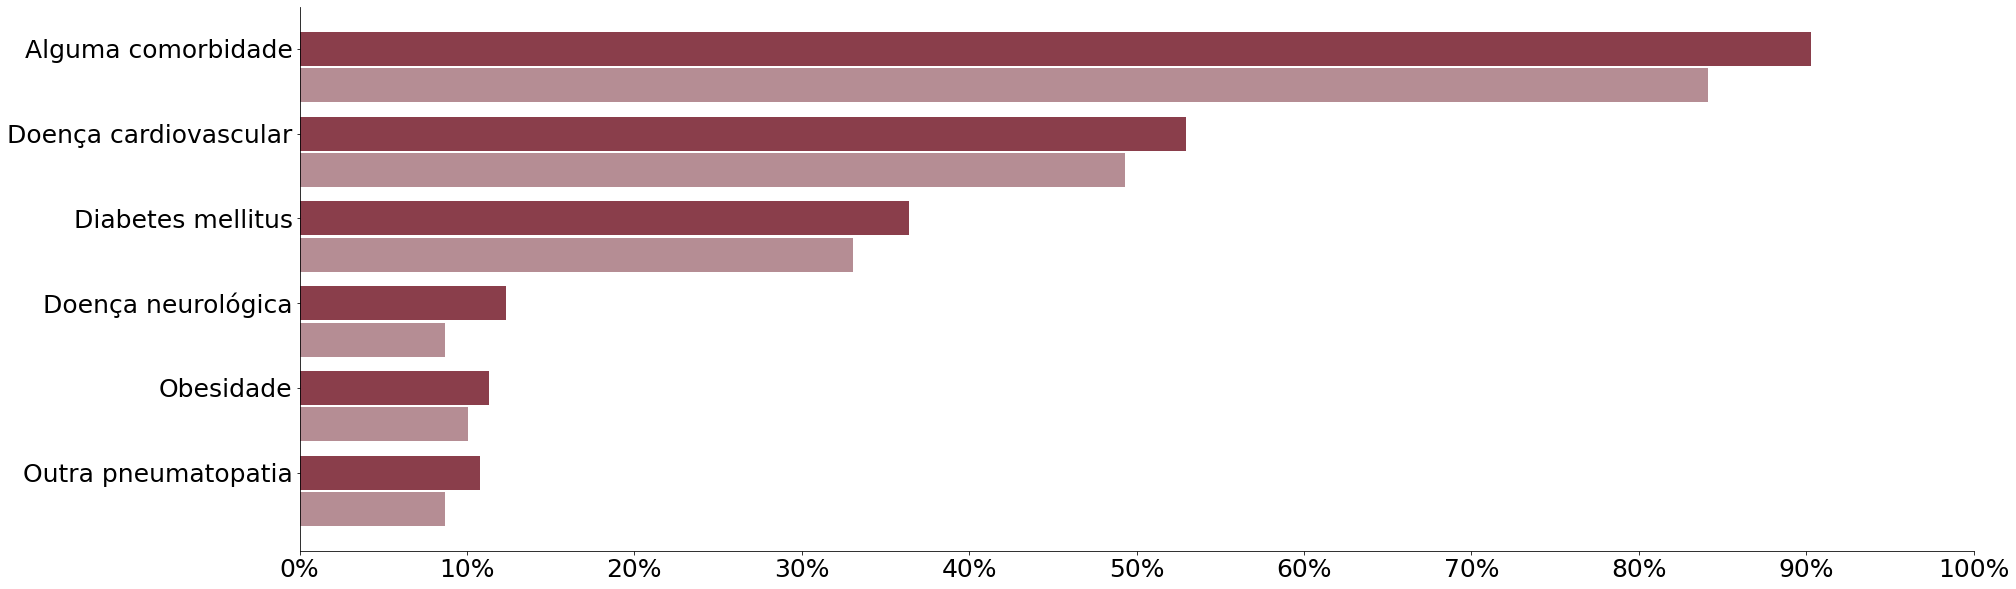

In [24]:
plt.figure(figsize=(30,10))
width=0.4
plt.barh(comorbidade,calcula_anos60Mais_obito,width,color='#8a3e4b')
plt.barh(np.arange(0,np.size(comorbidade),1)-0.43,calcula_anos60Mais_hospi,width,color='#b58d94')
sns.despine()
plt.xticks(np.arange(0,110,10),fontsize=25)
plt.yticks(fontsize=25)
plt.gca().set_xticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_xticks()])
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/Slide14_60 ou mais anos.png',dpi=720,bbox_inches='tight')